In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [81]:
#carregamento dos dados
df = pd.read_csv('prices.csv')

In [82]:
df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [83]:
#normalização
df_norm = (df - df.mean())/df.std()

In [84]:
df_norm

,size,bedroom,price
0,-0.247420,0.207020,0.393194
1,-0.923037,0.207020,-0.338816
2,0.149371,0.207020,0.070064
3,-1.169691,-1.242118,-1.362586
4,0.953677,1.656157,1.857216
5,-0.386833,-1.242118,-0.647307
6,1.623933,0.207020,0.028235


In [85]:
n_features = len(df_norm.columns) -1
n_features

2

In [86]:
#valores dos pesos randomicos antes do treinamento
w = np.random.rand(1, n_features+1)
w

array([[0.00375151, 0.44479209, 0.50730593]])

In [87]:
#separado os dados tamanho do imóvel e quantidade de banheiros dos preços aos quais buscaremos prever
#features e targets
X = np.array(df_norm.drop('price', axis=1))
y = df_norm.iloc[:, 2:3].values


In [88]:
'''tratando-se de múltiplas variáveis (tamanho do imóvel e quantidade de banheiros), a fórmula para os pesos é:
Wj = Wj - aplha/m * (somatório da hipóstese - Y(i)) * Xj(i)
fórmula hipótese: W(transposta)*X (matriz transposta de pesos para multiplicar-se com valores X)
nesta fórmula tem-se a necessidade de preencher os valores W0 com 1, junção a ser realizar abaixo:
'''
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones, X), axis =1)

In [89]:
''' função que retorna custo
custo = a soma de todos os valores hipótese - Y, elevado ao quadrado e dividido pela quantidade para obter média'''
def custo(w,X,y):
    m = len(X)
    erro = (X@w.T -y)
    custo = np.sum(np.power(erro,2))
    return custo/m

In [90]:
# definição de aplha, epoch e inserção de 1 para pesos w0
X = insert_ones(X)
alpha = 0.01
epoch = 800

In [91]:
''' função que realizará o gradiente descendente na quantidade de vees estipulada em epoch com a velocidade
já definidade na variável alpha, fórmula:
peso, menos alpha dividido pela quantidade de amostras de X, vezes somatório da hipótese menos Y, multiplicado por X
'''
def gradient_descent(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)
    for i in range(epoch):
        ''' hipotese = np.dot(X, w.T)
        erro = hipotese - y
        erro_x = erro * X
        somatorio = np.sum(erro_x, axis=0)
        gradiente = (alpha/len(X)) * somatorio
        w = w - gradiente
        cost = custo(w,X,y)'''
        w = w - (alpha/len(X)) * np.sum((X@w.T - y)*X, axis=0)
        cost[i] = custo(w,X,y)
    return w, cost


In [92]:
#obtendo pesos e custos com a fórmula do gradiente
w, cost = gradient_descent(w,X,y,alpha,epoch)

In [93]:
custo(w,X,y)

0.10072431565515123

Text(0.5, 1.0, 'Erro vs Epoch')

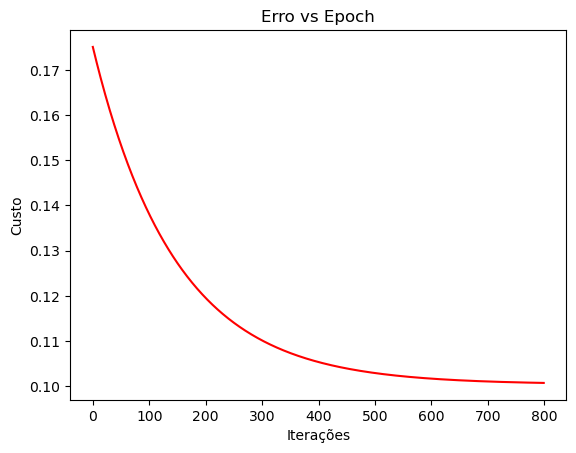

In [94]:
fig, ax = plt.subplots()
ax.plot(np.arange(epoch),cost,'r')
ax.set_xlabel("Iterações")
ax.set_ylabel("Custo")
ax.set_title("Erro vs Epoch")

In [95]:
#valores dos pesos após treinamento, idealizados para mensurar os valores dos imóveis com base no seu tramanho e quantidade de banheiros
w

array([[1.20881889e-06, 1.51254933e-01, 8.33544294e-01]])